In [7]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [3587]:
pip install xgboost

     ---------------------------------------- 89.1/89.1 MB 9.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [74]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time
import pandas as pd
import re

In [78]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

<b>DATA WEB-SCRAPING</b>

In [390]:
# Install Chrome Driver Manager

driver = webdriver.Chrome(service=ChromeService(executable_path=ChromeDriverManager().install()))

In [391]:
# Communicate your user-agent

opts = Options()
opts.add_argument
("user-agent= Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36")

driver = webdriver.Chrome(chrome_options=opts)

C:\Users\assaa\AppData\Local\Temp\ipykernel_30980\3194840701.py:7: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_options=opts)


In [392]:
# Open the first page that we need data from

driver.get("https://www.superimmo.com/achat/ile-de-france/p/0")

# Take a break

time.sleep(2)

# Finding the button of the pop-up window on the web page

button = driver.find_element(By.XPATH,"//*[@id='tarteaucitronPersonalize2']")

# Take a break

time.sleep(2)

# Click the button

button.click()

# Take a break

time.sleep(2)

In [393]:
all_data_dict = []

for n in range(1,500):
    for m in range(1,11):
        driver.get("https://www.superimmo.com/achat/ile-de-france/p/{}".format(n))
        time.sleep(0.5)

        data_dict = {}

        property_price = driver.find_element(by=By.XPATH,value=
                                             "//*[@id='pjax-container']/section/article[{}]/section/div[3]/p/a/b[1]".format(m))

        # Getting the formated property price
        data_dict['price EUR'] = property_price.text
        if data_dict['price EUR'] == '':
            data_dict['price EUR'] = data_dict['price EUR']
        else:
            data_dict['price EUR'] = int(re.sub(r'[^0-9]', '', data_dict['price EUR']))

        type_size_cells_rooms = driver.find_element(by=By.XPATH,value=
                                                    "//*[@id='pjax-container']/section/article[{}]/section/div[3]/p/a/b[2]".format(m))

        # Getting the formated type of the property
        data_dict['type'] = type_size_cells_rooms.text.split(" • ")
        data_dict['type'] = data_dict['type'][0]

        # Getting the formated size of the property
        data_dict['size m²'] = type_size_cells_rooms.text.split(" • ")
        if " m²" in data_dict['size m²'][1]:
            data_dict['size m²'] = data_dict['size m²'][1]
            data_dict['size m²'] = data_dict['size m²'].replace(" m²", "")
            if "," in data_dict['size m²']:
                data_dict['size m²'] = float(data_dict['size m²'].replace(" m²", "").replace(",","."))
            else:
                data_dict['size m²'] = int(data_dict['size m²'].replace(" ", ""))
        else:
            data_dict['size m²'] == None

        # Getting the formated number of cells of the property
        data_dict['cells'] = type_size_cells_rooms.text
        if "pièces" in data_dict['cells']:
            sindex = re.search(r"pièces",data_dict['cells']).start()
            data_dict['cells'] = data_dict['cells'][re.search(r"pièces",data_dict['cells']).start()-2:sindex+len(r"pièces")]
            data_dict['cells'] = int(data_dict['cells'].replace(" pièces", ""))
        elif "pièce" in data_dict['cells']:
            sindex = re.search(r"pièce",data_dict['cells']).start()
            data_dict['cells'] = data_dict['cells'][re.search(r"pièce",data_dict['cells']).start()-2:sindex+len(r"pièce")]
            data_dict['cells'] = int(data_dict['cells'].replace(" pièce", ""))
        else:
            data_dict['cells'] = None
            
        # Getting the formated number of bedrooms of the property
        data_dict['rooms'] = type_size_cells_rooms.text
        if "chambres" in data_dict["rooms"]:
            sindex = re.search(r"chambres",data_dict["rooms"]).start()
            data_dict["rooms"] = data_dict["rooms"][re.search(r"chambres",data_dict["rooms"]).start()-2:sindex+len(r"chambres")]
            data_dict["rooms"] = int(data_dict["rooms"].replace(" chambres", ""))
        elif "chambre" in data_dict["rooms"]:
            sindex = re.search(r"chambre",data_dict["rooms"]).start()
            data_dict["rooms"] = data_dict["rooms"][re.search(r"chambre",data_dict["rooms"]).start()-2:sindex+len(r"chambre")]
            data_dict["rooms"] = int(data_dict["rooms"].replace(" chambre", ""))
        else:
            data_dict['rooms'] = None
            
        city_postcode = driver.find_element(by=By.XPATH,value=
                                            "//*[@id='pjax-container']/section/article[{}]/section/div[3]/b".format(m))

        # Getting the formated city name of the property
        data_dict['city']= city_postcode.text
        data_dict['city']= re.sub('[0-9]','', data_dict['city'])
        data_dict['city']= re.sub(r'\W+', '', data_dict['city'])
        if data_dict['city'] == "Parisème":
            sindex = re.search(r"Paris",data_dict["city"]).start()
            data_dict['city'] = data_dict['city'][re.search(r"Paris",data_dict['city']).start():sindex+len(r"Paris")]
        else:
            data_dict['city']= data_dict['city']

        # Getting the formated postal code of the property
        data_dict['postal_code']= city_postcode.text
        data_dict['postal_code']= re.sub('[^0-9\,]','', data_dict['postal_code'])
        if len(data_dict['postal_code']) == 7:
            data_dict['postal_code'] = data_dict['postal_code'][2:]
        elif len(data_dict['postal_code']) == 6:
            data_dict['postal_code'] = data_dict['postal_code'][1:]
        else:
            data_dict['postal_code'] = data_dict['postal_code']

        time.sleep(0.5)

        all_data_dict.append(data_dict)
        
        df = pd.DataFrame.from_dict(all_data_dict)

In [406]:
df.head(5)

,price EUR,type,size m²,cells,rooms,city,postal_code
0,548000,Appartement,87,4.0,3.0,AsnièressurSeine,92600
1,165000,Appartement,42.09,2.0,1.0,LesPavillonssousBois,93320
2,435000,Appartement,66,3.0,2.0,Montreuil,93100
3,199000,Appartement,68.48,3.0,2.0,RosnysousBois,93110
4,175000,Appartement,93,5.0,4.0,Aubergenville,78410


<b>EXPLORATORY DATA ANALYSIS</b>

In [3518]:
print("The dataset is composed of", df.shape[0], "rows and", df.shape[1], "columns")

The dataset is composed of 4990 rows and 8 columns


In [3519]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price EUR    4990 non-null   int64  
 1   type         4990 non-null   object 
 2   size m²      4990 non-null   float64
 3   cells        4990 non-null   float64
 4   rooms        4990 non-null   float64
 5   city         4990 non-null   object 
 6   postal_code  4990 non-null   object 
 7   price/m²     4990 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 312.0+ KB


In [3520]:
# Calculating the percentage of missing values per feature column with the data type of each column

percent_missing = df.isnull().mean()
missing_value_df = pd.DataFrame(percent_missing).reset_index() # convert to DataFrame
missing_value_df = missing_value_df.rename(columns = {"index" : "feature", 0 : "percent_missing"}) # rename columns
missing_value_df = missing_value_df.sort_values(by = ['percent_missing'], ascending = False) # sort the values
data_types_df = pd.DataFrame(df.dtypes).reset_index().rename(columns = {"index" : "feature", 0 : "data_type"}) # rename columns
missing_value_df = missing_value_df.merge(data_types_df, on = "feature") # join the dataframe with datatype
missing_value_df.percent_missing = round(missing_value_df.percent_missing*100, 2) # format the percent_missing

missing_value_df
# rooms column contains the highest percentage of missing values of 19.88%

,feature,percent_missing,data_type
0,price EUR,0.0,int64
1,type,0.0,object
2,size m²,0.0,float64
3,cells,0.0,float64
4,rooms,0.0,float64
5,city,0.0,object
6,postal_code,0.0,object
7,price/m²,0.0,float64


In [3521]:
# Changing some columns types to be able to manipulate the data
df["size m²"] = pd.to_numeric(df["size m²"])

In [3522]:
# Discovering the count of different values within each categorical column 

categorical_columns = list(df.select_dtypes(['object']).columns)
cat_df = []

for c in categorical_columns:
    cat_df.append({"categorical_feature": c, "number_categories": len(df[c].value_counts(dropna = False))})
pd.DataFrame(cat_df).sort_values(by = "number_categories", ascending = False)

,categorical_feature,number_categories
1,city,570
2,postal_code,450
0,type,3


In [3523]:
# Filling null values of rooms column with "0"
df["rooms"] = df["rooms"].fillna(0)

# Filling null values of cells column with "1"
df["cells"] = df["cells"].fillna(1)

# Filling null values of size column with the average size of apartments in Ile-de-France
df["size m²"] = df["size m²"].fillna(df["size m²"].mean())

In [3524]:
# Calculating the percentage of missing values one last time to make sure there are no missing data anymore

percent_missing = df.isnull().mean()
missing_value_df = pd.DataFrame(percent_missing).reset_index() # convert to DataFrame
missing_value_df = missing_value_df.rename(columns = {"index" : "feature", 0 : "percent_missing"}) # rename columns
missing_value_df = missing_value_df.sort_values(by = ['percent_missing'], ascending = False) # sort the values
data_types_df = pd.DataFrame(df.dtypes).reset_index().rename(columns = {"index" : "feature", 0 : "data_type"}) # rename columns
missing_value_df = missing_value_df.merge(data_types_df, on = "feature") # join the dataframe with datatype
missing_value_df.percent_missing = round(missing_value_df.percent_missing*100, 2) # format the percent_missing

missing_value_df
# rooms column contains the highest percentage of missing values of 19.88%

,feature,percent_missing,data_type
0,price EUR,0.0,int64
1,type,0.0,object
2,size m²,0.0,float64
3,cells,0.0,float64
4,rooms,0.0,float64
5,city,0.0,object
6,postal_code,0.0,object
7,price/m²,0.0,float64


In [3525]:
round(df.describe())

,price EUR,size m²,cells,rooms,price/m²
count,4990.0,4990.0,4990.0,4990.0,4990.0
mean,464363.0,78.0,3.0,2.0,6664.0
std,561668.0,52.0,2.0,1.0,19060.0
min,49000.0,8.0,0.0,0.0,626.0
25%,240125.0,49.0,2.0,1.0,3792.0
50%,369900.0,67.0,3.0,2.0,5704.0
75%,559000.0,90.0,4.0,3.0,8497.0
max,31998857.0,1214.0,9.0,8.0,1333286.0


In [3526]:
# Identifying correlations in data

corr = df.corr()
corr

# The size correlates most with the price, however the correlation is not so strong

,price EUR,size m²,cells,rooms,price/m²
price EUR,1.000000,0.321891,0.243911,0.198367,0.836149
size m²,0.321891,1.000000,0.653169,0.626785,-0.054406
cells,0.243911,0.653169,1.000000,0.699331,-0.050874
rooms,0.198367,0.626785,0.699331,1.000000,-0.062159
price/m²,0.836149,-0.054406,-0.050874,-0.062159,1.000000


In [3527]:
# Identifying patterns to look for correlations between features

correlation_threshold = 0.3

corr_matrix = df.corr().abs() # calculate the correlation matrix with 
high_corr_var = np.where(corr_matrix >= correlation_threshold) # identify variables that have correlations above defined threshold
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y], round(corr_matrix.iloc[x, y], 2))
                     for x, y in zip(*high_corr_var) if x != y and x < y] # identify pairs of highly correlated variables

if high_corr_var != []:
    high_corr_var_df = pd.DataFrame(high_corr_var).rename(columns = {0: 'corr_feature',
                                                                 1: 'drop_feature',
                                                                 2: 'corrrelation_values'})
    high_corr_var_df = high_corr_var_df.sort_values(by = 'corrrelation_values', ascending = False)
else:
    high_corr_var_df = print("there are no pairs of correlations with that threshold")

high_corr_var_df

,corr_feature,drop_feature,corrrelation_values
1,price EUR,price/m²,0.84
4,cells,rooms,0.70
2,size m²,cells,0.65
3,size m²,rooms,0.63
0,price EUR,size m²,0.32


In [3528]:
# Identifying features with low variance
std_df = pd.DataFrame(df.std()).rename(columns = {0: 'standard_deviation'})

low_var_features = list(std_df[std_df['standard_deviation'] < 0.1].index)

print("number of low variance features:", len(low_var_features))
print("low variance features:", low_var_features)

low_var_features

# Below the threshold of 10%, there are no low-variance features in the data

number of low variance features: 0
low variance features: []


C:\Users\assaa\AppData\Local\Temp\ipykernel_30980\1144617806.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_df = pd.DataFrame(df.std()).rename(columns = {0: 'standard_deviation'})


[]

In [3529]:
# Checking the average count of real estate ads scraped per city

print("Average count of real estate ads per city is:", round(df.groupby('city')['city'].count().mean(),1), "ads")

Average count of real estate ads per city is: 8.8 ads


In [3530]:
# Checking the number of cities scraped

df["city"].nunique()

570

In [3531]:
# Checking the percentage representation of top 10 cities in terms of number of properties scraped

round(df["city"].value_counts(normalize = True)*100, 1).head(10)

Paris                  19.7
IvrysurSeine            2.2
AsnièressurSeine        1.6
BoulogneBillancourt     1.6
SaintOuen               1.5
IssylesMoulineaux       1.4
Versailles              1.4
RueilMalmaison          1.3
Clamart                 1.2
SaintMaurdesFossés      1.2
Name: city, dtype: float64

In [3532]:
df

,price EUR,type,size m²,cells,rooms,city,postal_code,price/m²
0,548000,Appartement,87.00,4.0,3.0,AsnièressurSeine,92600,6299.0
1,165000,Appartement,42.09,2.0,1.0,LesPavillonssousBois,93320,3920.0
2,435000,Appartement,66.00,3.0,2.0,Montreuil,93100,6591.0
3,199000,Appartement,68.48,3.0,2.0,RosnysousBois,93110,2906.0
4,175000,Appartement,93.00,5.0,4.0,Aubergenville,78410,1882.0
...,...,...,...,...,...,...,...,...
4985,140000,Appartement,10.32,1.0,0.0,Paris,75018,13566.0
4986,496000,Appartement,42.00,2.0,1.0,Paris,75011,11810.0
4987,318000,Appartement,32.92,2.0,1.0,Paris,75012,9660.0
4988,614000,Appartement,68.00,4.0,3.0,Paris,75012,9029.0


<b>FEATURE ENGINEERING</b>

In [3788]:
# Creating a copy dataframe of df to avoid losing any progress
df_eng = df.copy()

In [3789]:
# Checking count of cell values

df_eng["cells"].value_counts()

3.0    1484
4.0    1050
2.0    1026
5.0     508
1.0     395
6.0     255
7.0     159
8.0      72
9.0      22
0.0      19
Name: cells, dtype: int64

In [3790]:
# Replacing 0 cell with 1 cell

df_eng["cells"] = df_eng["cells"].replace(0.0, 1.0)

df_eng["cells"].value_counts()

3.0    1484
4.0    1050
2.0    1026
5.0     508
1.0     414
6.0     255
7.0     159
8.0      72
9.0      22
Name: cells, dtype: int64

In [3791]:
# Creating a price per sqm column

df_eng["price/m²"] = round(df_eng["price EUR"] / df_eng["size m²"])

In [3792]:
# Dropping price EUR and size m² columns

df_eng = df_eng.drop(columns = ["price EUR", "size m²"])
df_eng

,type,cells,rooms,city,postal_code,price/m²
0,Appartement,4.0,3.0,AsnièressurSeine,92600,6299.0
1,Appartement,2.0,1.0,LesPavillonssousBois,93320,3920.0
2,Appartement,3.0,2.0,Montreuil,93100,6591.0
3,Appartement,3.0,2.0,RosnysousBois,93110,2906.0
4,Appartement,5.0,4.0,Aubergenville,78410,1882.0
...,...,...,...,...,...,...
4985,Appartement,1.0,0.0,Paris,75018,13566.0
4986,Appartement,2.0,1.0,Paris,75011,11810.0
4987,Appartement,2.0,1.0,Paris,75012,9660.0
4988,Appartement,4.0,3.0,Paris,75012,9029.0


In [3793]:
# Counting unique values of postal codes
df_eng["postal_code"].nunique()

450

In [3794]:
# Creating a district column to decrease the number of postal codes
df_eng["district_code"] = df_eng["postal_code"].str[:2]
df_eng["district_code"] = df_eng["district_code"].replace("", None)
df_eng["district_code"] = df_eng["district_code"].str[:2]
df_eng.head(10)

,type,cells,rooms,city,postal_code,price/m²,district_code
0,Appartement,4.0,3.0,AsnièressurSeine,92600,6299.0,92
1,Appartement,2.0,1.0,LesPavillonssousBois,93320,3920.0,93
2,Appartement,3.0,2.0,Montreuil,93100,6591.0,93
3,Appartement,3.0,2.0,RosnysousBois,93110,2906.0,93
4,Appartement,5.0,4.0,Aubergenville,78410,1882.0,78
5,Appartement,2.0,1.0,Paris,75018,11170.0,75
6,Appartement,7.0,4.0,NeuillysurSeine,92200,12025.0,92
7,Appartement,3.0,2.0,Paris,75013,10528.0,75
8,Appartement,1.0,0.0,Courbevoie,92400,7933.0,92
9,Appartement,2.0,1.0,Paris,75014,10224.0,75


In [3795]:
df_eng["district_code"].value_counts()

75    986
92    844
78    743
94    650
93    547
77    474
95    377
91    348
Name: district_code, dtype: int64

In [3796]:
# Detecting outliers in price/m²

def find_outliers_IQR(df_eng):
    q1=df_eng.quantile(0.25)
    q3=df_eng.quantile(0.75)
    IQR=q3-q1
    outliers = df_eng[((df_eng<(q1-1.5*IQR)) | (df_eng>(q3+1.5*IQR)))]
    return outliers
price_per_sqm_outliers = find_outliers_IQR(df_eng["price/m²"])

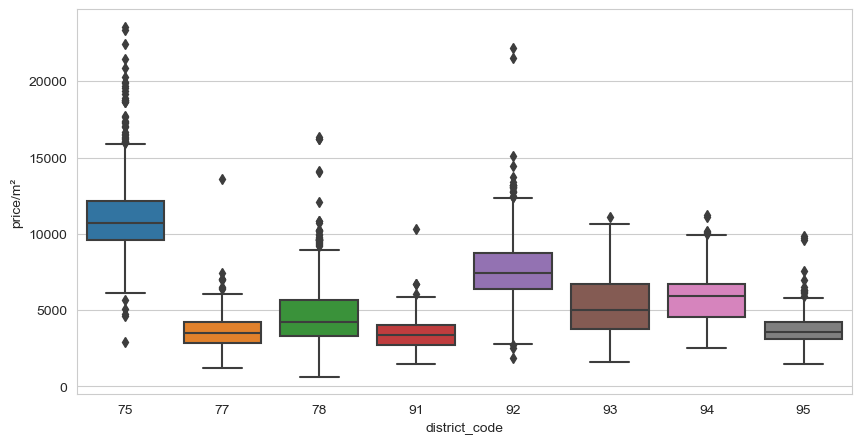

In [3797]:
y = df_eng["price/m²"][df_eng["price/m²"] < 50000]

plt.figure(figsize=(10,5))

sns.set_style("whitegrid")
box_plot = sns.boxplot(data=df_eng, x=df_eng["district_code"].sort_values(ascending=True), y=y)

plt.show()

In [3798]:
# Dropping the city and postal code columns
df_eng = df_eng.drop(columns = ["city", "postal_code"])

In [3799]:
# Checking unique types of properties
df_eng["type"].value_counts()

Appartement         4153
Maison               833
Appartement neuf       4
Name: type, dtype: int64

In [3800]:
# Replacing "Appartement neuf" with "Appartement" because there is no need for this small complexity
df_eng["type"] = df_eng["type"].replace("Appartement neuf", "Appartement")

In [3801]:
# Checking for null values 

len(df_eng["district_code"][df_eng["district_code"].isnull()])

21

In [3802]:
# Dropping null values in district_code column

df_eng = df_eng.dropna()

# re-checking the shape of the dataset

print("The dataset is now composed of", df_eng.shape[0], "rows and", df_eng.shape[1], "columns")

The dataset is now composed of 4969 rows and 5 columns


In [3803]:
# One-hot encoding the categorical variables: type and district_code

for c in df_eng[["type", "district_code"]]:
    dummies = pd.get_dummies(df_eng[c], prefix=c)
    df_eng = pd.concat([df_eng, dummies], axis=1)
    df_eng.drop(c, axis = 1, inplace = True)
df_eng

,cells,rooms,price/m²,type_Appartement,type_Maison,district_code_75,district_code_77,district_code_78,district_code_91,district_code_92,district_code_93,district_code_94,district_code_95
0,4.0,3.0,6299.0,1,0,0,0,0,0,1,0,0,0
1,2.0,1.0,3920.0,1,0,0,0,0,0,0,1,0,0
2,3.0,2.0,6591.0,1,0,0,0,0,0,0,1,0,0
3,3.0,2.0,2906.0,1,0,0,0,0,0,0,1,0,0
4,5.0,4.0,1882.0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,1.0,0.0,13566.0,1,0,1,0,0,0,0,0,0,0
4986,2.0,1.0,11810.0,1,0,1,0,0,0,0,0,0,0
4987,2.0,1.0,9660.0,1,0,1,0,0,0,0,0,0,0
4988,4.0,3.0,9029.0,1,0,1,0,0,0,0,0,0,0


<b>MACHINE LEARNING MODEL</b>

GRADIENT BOOSTING REGRESSOR

In [3852]:
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.model_selection import learning_curve

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split


from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [3853]:
pca = PCA()
pca = pca.fit(df_eng)
dataPCA = pca.transform(df_eng)
dataPCA = pd.DataFrame(dataPCA)
dataPCA = dataPCA.rename(columns = {0:"cells", 1:"rooms", 2:"price/m²", 3:"type_Appartement", 4:"type_Maison", 
                                    5:"district_code_75", 6:"district_code_77", 7:"district_code_78", 8:"district_code_91", 
                                    9:"district_code_92", 10:"district_code_93", 11:"district_code_94", 12:"district_code_95"})
dataPCA.head(5)

,cells,rooms,price/m²,type_Appartement,type_Maison,district_code_75,district_code_77,district_code_78,district_code_91,district_code_92,district_code_93,district_code_94,district_code_95
0,-378.818884,1.088962,0.470287,-0.082162,0.900754,-0.371985,0.100981,-0.095945,-0.024260,-0.077109,-0.047155,-1.871536e-16,2.652501e-16
1,-2757.818867,-1.701965,0.221493,0.186180,0.008366,0.279684,0.017861,0.795182,-0.364077,-0.208086,0.007487,8.259250e-16,-9.557242e-17
2,-86.818876,-0.298757,0.326836,-0.025274,0.137778,0.340798,0.053722,0.815980,-0.342082,-0.216801,-0.012745,3.540802e-16,1.125944e-16
3,-3771.818876,-0.323063,0.324646,-0.033728,0.135379,0.334292,0.053669,0.813290,-0.344920,-0.218836,-0.012770,3.540802e-16,-2.618348e-17
4,-4795.818894,2.500877,0.575146,-0.209729,0.050386,0.296841,0.901216,-0.078445,0.212434,-0.053440,-0.197967,-1.699832e-15,8.960931e-17


In [3854]:
X = dataPCA.drop(columns=["price/m²"])
y = dataPCA["price/m²"]

In [3855]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3, random_state =42)

In [3856]:
gbr = GradientBoostingRegressor()

In [3857]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [3858]:
y_pred = gbr.predict(X_test)

In [3859]:
print(r2_score(y_train,gbr.predict(X_train))*100)
print(r2_score(y_test, y_pred)*100)

92.42819212328692
87.94016512779834


In [3860]:
train_sizes, train_scores, test_scores = learning_curve(gbr, X, y, cv=10, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

In [3861]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

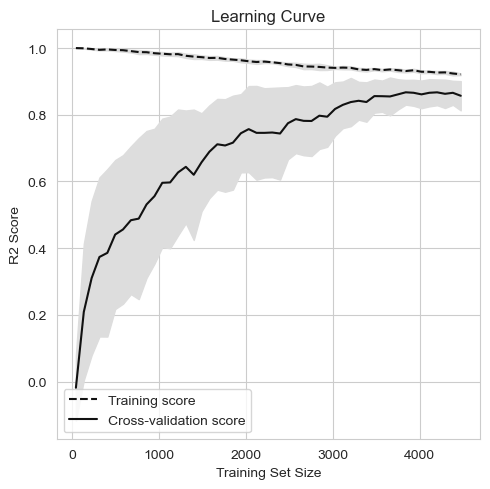

In [3862]:
plt.subplots(1, figsize=(5,5))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("R2 Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [3863]:
def feature_importance_plot(model, X_train, n):
    """Plots feature importance - this only works for Decision Tree based Models"""
    plt.figure(figsize=(8, 5)) # set figure size
    feat_importances = pd.Series(model.feature_importances_,
                                 index = X_train.columns)
    feat_importances.nlargest(n).plot(kind = 'bar')
    plt.title(f"Top {n} Features")
    plt.show()

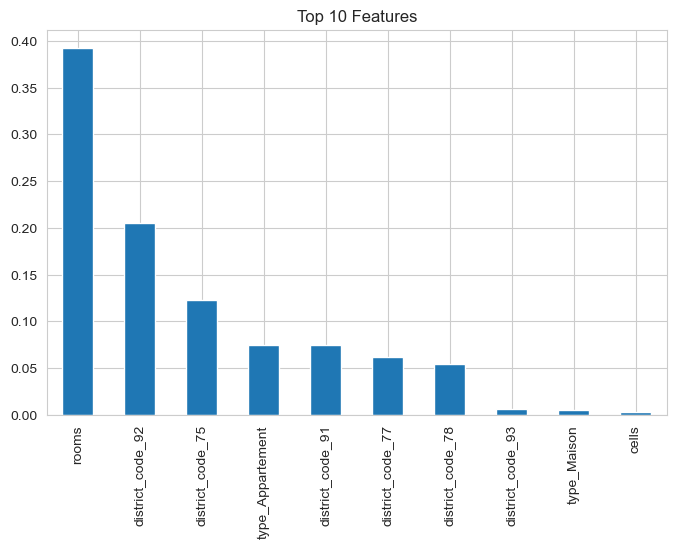

In [3864]:
feature_importance_plot(gbr, X_train, 10)

In [3865]:
from sklearn.metrics import mean_squared_error

In [3866]:
mean_squared_error(y_test, y_pred)

0.08285542167485734

RANDOM FOREST REGRESSOR

In [3867]:
from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import learning_curve
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [3868]:
pca = PCA()
pca = pca.fit(df_eng)
dataPCA = pca.transform(df_eng)
dataPCA = pd.DataFrame(dataPCA)
dataPCA = dataPCA.rename(columns = {0:"cells", 1:"rooms", 2:"price/m²", 3:"type_Appartement", 4:"type_Maison", 
                                    5:"district_code_75", 6:"district_code_77", 7:"district_code_78", 8:"district_code_91", 
                                    9:"district_code_92", 10:"district_code_93", 11:"district_code_94", 12:"district_code_95"})

In [3869]:
X = dataPCA.drop(columns=["price/m²"])
y = dataPCA["price/m²"]

In [3870]:
rf = RandomForestRegressor()

In [3871]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3, random_state =42)

In [3872]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [3873]:
y_pred = rf.predict(X_test)

In [3874]:
print(r2_score(y_train,rf.predict(X_train))*100)
print(r2_score(y_test, y_pred)*100)

98.54101589078111
94.0297546475706


In [3875]:
train_sizes, train_scores, test_scores = learning_curve(rf, X, y, cv=10, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

In [3876]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

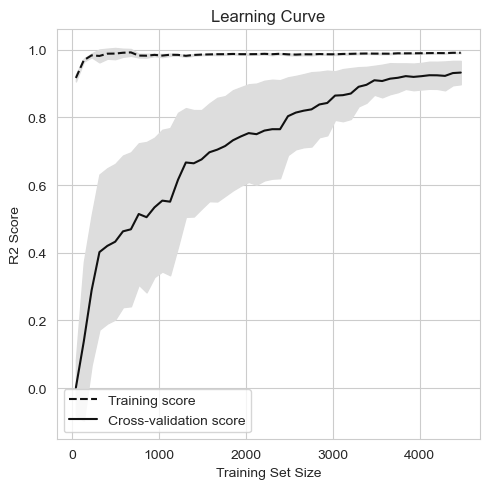

In [3877]:
plt.subplots(1, figsize=(5,5))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("R2 Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

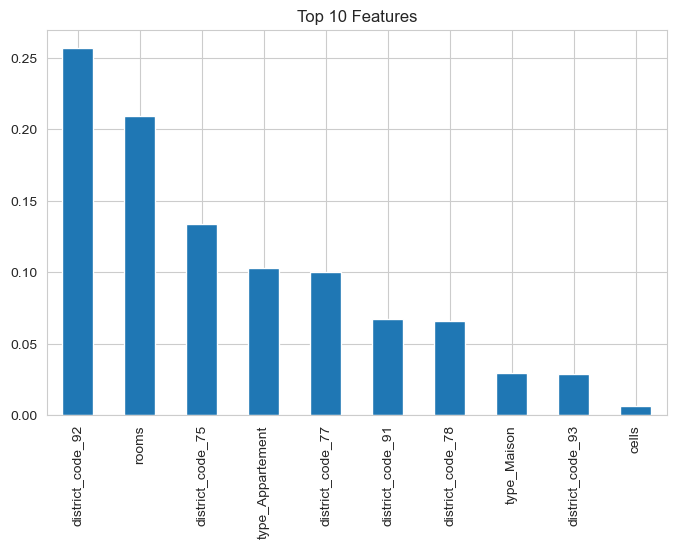

In [3878]:
feature_importance_plot(rf, X_train, 10)

In [3879]:
mean_squared_error(y_test, y_pred)

0.04101774206860169

XGBOOST REGRESSOR

In [3880]:
import xgboost

from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score

In [3881]:
pca = PCA()
pca = pca.fit(df_eng)
dataPCA = pca.transform(df_eng)
dataPCA = pd.DataFrame(dataPCA)
dataPCA = dataPCA.rename(columns = {0:"cells", 1:"rooms", 2:"price/m²", 3:"type_Appartement", 4:"type_Maison", 
                                    5:"district_code_75", 6:"district_code_77", 7:"district_code_78", 8:"district_code_91", 
                                    9:"district_code_92", 10:"district_code_93", 11:"district_code_94", 12:"district_code_95"})

In [3882]:
X = dataPCA.drop(columns=["price/m²"])
y = dataPCA["price/m²"]

In [3883]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3, random_state =42)

In [3884]:
xgb = XGBRegressor()

In [3885]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [3886]:
y_pred = xgb.predict(X_test)

In [3887]:
print(r2_score(y_train,xgb.predict(X_train))*100)
print(r2_score(y_test, y_pred)*100)

99.98755148554903
94.80244401019813


In [3888]:
train_sizes, train_scores, test_scores = learning_curve(xgb, X, y, cv=10, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

In [3889]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

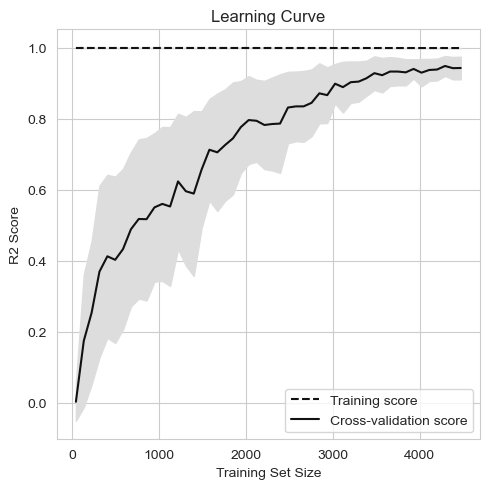

In [3890]:
plt.subplots(1, figsize=(5,5))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("R2 Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

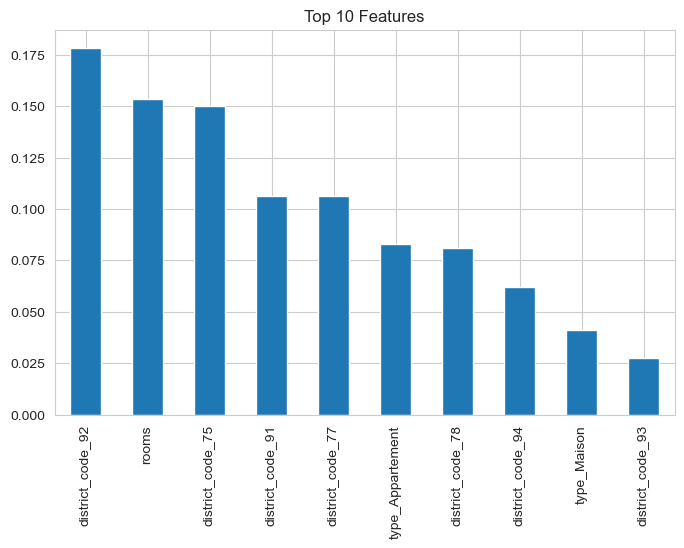

In [3891]:
feature_importance_plot(xgb, X_train, 10)

In [3892]:
mean_squared_error(y_test, y_pred)

0.03570908704615585